In [1]:
!pip install unidecode

You should consider upgrading via the 'c:\users\aaron\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
import unidecode
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.impute import SimpleImputer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim import corpora
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
project_path = '/content/drive/MyDrive/MMA'
 
df= pd.read_csv(project_path + '/enron.csv')

In [7]:
# Run this cell if you have the enron file locally
# #########################################################
# # Load Enron dataset
# #########################################################
df = pd.read_csv('enron.csv', header=0, sep=',', quotechar='"')
df.head()

,Message-ID,Date,From,To,Subject,Message,Cc,Bcc
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,Here is our forecast\n\n \n,NaN,NaN
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,Traveling to have a business meeting takes the...,NaN,NaN
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,test successful. way to go!!!\n,NaN,NaN
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",NaN,NaN
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45. \n,NaN,NaN


In [8]:
df.head()

,Message-ID,Date,From,To,Subject,Message,Cc,Bcc
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,Here is our forecast\n\n \n,NaN,NaN
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,Traveling to have a business meeting takes the...,NaN,NaN
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,test successful. way to go!!!\n,NaN,NaN
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",NaN,NaN
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45. \n,NaN,NaN


In [9]:
missing_prop=df.isna().sum()/len(df)
missing_prop[missing_prop>0].sort_values(ascending=False)

Cc         0.752840
Bcc        0.752840
To         0.042225
Subject    0.037081
dtype: float64

In [10]:
for col in df.columns:
  print(col,df[col].nunique())

Message-ID 517401
Date 224128
From 20328
To 58563
Subject 159341
Message 249013
Cc 29595
Bcc 29595


In [11]:
df.dtypes

Message-ID    object
Date          object
From          object
To            object
Subject       object
Message       object
Cc            object
Bcc           object
dtype: object

In [12]:
def employee(field):
    column = []
    for string in field:
        column.append(string.split("@")[0])
    return column

df['employee_from'] = employee(df['From'])

In [13]:
#filling in Null with empty string to perform transformation on it
df['To']=df['To'].fillna("")
df['employee_to'] = employee(df['To'])

Getting top 20 email sender employees

In [14]:
top_20 = pd.DataFrame(df['employee_from'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name_sender", "Counts"]
top_20

,Employee_name_sender,Counts
0,kay.mann,16735
1,vince.kaminski,14368
2,jeff.dasovich,11411
3,pete.davis,9149
4,chris.germany,8801
5,sara.shackleton,8777
6,enron.announcements,8587
7,tana.jones,8490
8,steven.kean,6759
9,kate.symes,5438


<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Counts', ylabel='Employee_name_sender'>

Text(0.5, 1.0, 'Top 20 highest email sender employee')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Employee_name')

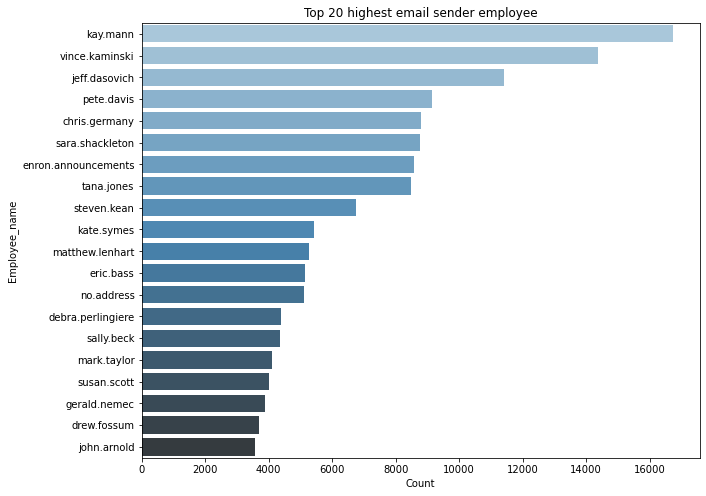

In [15]:
plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name_sender", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

Getting top 20 email receiving employees

In [16]:
top_20_receiver = pd.DataFrame(df['employee_to'].value_counts()[:20])
top_20_receiver.reset_index(inplace=True)
top_20_receiver.columns = ["Employee_name_receiver", "Counts"]

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='Counts', ylabel='Employee_name_receiver'>

Text(0.5, 1.0, 'Top 20 highest email sender employee')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Employee_name')

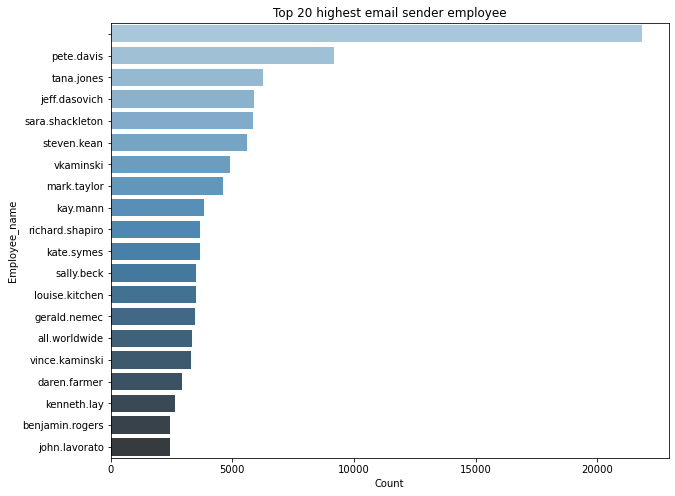

In [17]:
plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name_receiver", x="Counts", data=top_20_receiver, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

In [18]:
import datetime
from dateutil import parser

def change_type(row):
  return parser.parse(row).strftime("%d-%m-%Y %H:%M:%S")
df['Date'] = df['Date'].apply(change_type)
df.head(2)

,Message-ID,Date,From,To,Subject,Message,Cc,Bcc,employee_from,employee_to
0,<18782981.1075855378110.JavaMail.evans@thyme>,14-05-2001 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,Here is our forecast\n\n \n,NaN,NaN,phillip.allen,tim.belden
1,<15464986.1075855378456.JavaMail.evans@thyme>,04-05-2001 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Traveling to have a business meeting takes the...,NaN,NaN,phillip.allen,john.lavorato


In [19]:
df['Subject']=df['Subject'].replace('',np.nan)

In [20]:
# fixing subject column
imputer_cat = SimpleImputer(missing_values = np.nan, strategy='constant')
imputer_cat.fit(df[['Subject']])
df['Subject'] = imputer_cat.transform(df[['Subject']])

SimpleImputer(strategy='constant')

In [21]:
def clean_subject(text):
  text=text.lower()
  text=re.sub(r're:', '', text).strip()
  text=re.sub(r'fw:', '', text).strip()
  return text
df['Subject'] = df['Subject'].apply(clean_subject)

In [22]:
df['Subject']

0                     missing_value
1                                  
2                              test
3                     missing_value
4                             hello
                    ...            
517396     trade with john lavorato
517397                   gas hedges
517398                 confidential
517399    calgary analyst/associate
517400                 ali's essays
Name: Subject, Length: 517401, dtype: object

<AxesSubplot:xlabel='Subject'>

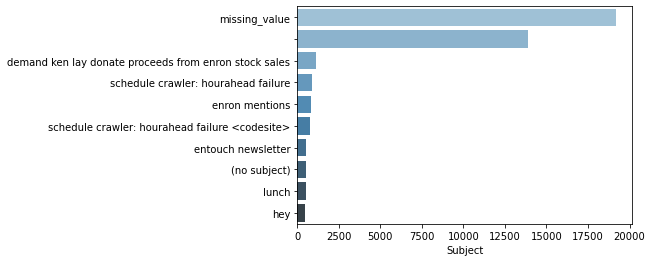

In [23]:
#Most frequent Subject
sns.barplot(y=df['Subject'].value_counts()[:10].index,
            x=df['Subject'].value_counts()[:10],
            orient='h',palette="Blues_d")

In [24]:
#just for trial purposes
#df1=df.copy()
#df1=df1[:30000]

In [32]:
df.head()

,Message-ID,Date,From,To,Subject,Message,Cc,Bcc,employee_from,employee_to
0,<18782981.1075855378110.JavaMail.evans@thyme>,14-05-2001 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,,here is our forecast,,,phillip.allen,tim.belden
1,<15464986.1075855378456.JavaMail.evans@thyme>,04-05-2001 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,,traveling to have a business meeting takes the...,,,phillip.allen,john.lavorato
2,<24216240.1075855687451.JavaMail.evans@thyme>,18-10-2000 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,test,test successful way to go,,,phillip.allen,leah.arsdall
3,<13505866.1075863688222.JavaMail.evans@thyme>,23-10-2000 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,,randy can you send me a schedule of the salary...,,,phillip.allen,randall.gay
4,<30922949.1075863688243.JavaMail.evans@thyme>,31-08-2000 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,hello,let s shoot for tuesday at,,,phillip.allen,greg.piper


In [31]:
df['Subject'] = df['Subject'].str.lower()
df['Subject'] = df['Subject'].str.replace('re:', ' ')
df['Subject'] = df['Subject'].str.replace('fw:', ' ')
df['Subject'] = df['Subject'].str.replace(r'[^a-z]', ' ')
df['Subject'] = df['Subject'].str.replace(r'\s+', ' ')
df['Subject'] = df['Subject'].str.replace(r'missing value', ' ')

In [26]:
# clean up content line
df['Message'] = df['Message'].str.lower()
df['Message'] = df['Message'].str.replace(r'[^a-z]', ' ')
df['Message'] = df['Message'].str.replace('fw:', ' ')
df['Message'] = df['Message'].str.replace(r'\s+', ' ')

In [29]:
df.fillna('', inplace = True)

In [33]:
#data preprocessing 
wn=nltk.WordNetLemmatizer()
stop_words=set(stopwords.words('english')+['pm','phillip'])

def clean_text(text):
        text = BeautifulSoup(text, ["lxml"]).get_text()        
        text="".join([char.lower() for char in text if char not in string.punctuation])
        text= re.sub(r'\d+', '', text)
        text=re.sub(r'\n', '', text).strip()
        tokens=nltk.word_tokenize(text.strip())
        text=[t for t in tokens if t not in stop_words]
        text=[unidecode.unidecode(w) for w in text]
        text=" ".join([wn.lemmatize(word)for word in text])
        return text

df["Message_clean"]=df["Message"].apply(lambda x:clean_text(x))

In [34]:
df.head()

,Message-ID,Date,From,To,Subject,Message,Cc,Bcc,employee_from,employee_to,Message_clean
0,<18782981.1075855378110.JavaMail.evans@thyme>,14-05-2001 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,,here is our forecast,,,phillip.allen,tim.belden,forecast
1,<15464986.1075855378456.JavaMail.evans@thyme>,04-05-2001 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,,traveling to have a business meeting takes the...,,,phillip.allen,john.lavorato,traveling business meeting take fun trip espec...
2,<24216240.1075855687451.JavaMail.evans@thyme>,18-10-2000 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,test,test successful way to go,,,phillip.allen,leah.arsdall,test successful way go
3,<13505866.1075863688222.JavaMail.evans@thyme>,23-10-2000 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,,randy can you send me a schedule of the salary...,,,phillip.allen,randall.gay,randy send schedule salary level everyone sche...
4,<30922949.1075863688243.JavaMail.evans@thyme>,31-08-2000 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,hello,let s shoot for tuesday at,,,phillip.allen,greg.piper,let shoot tuesday


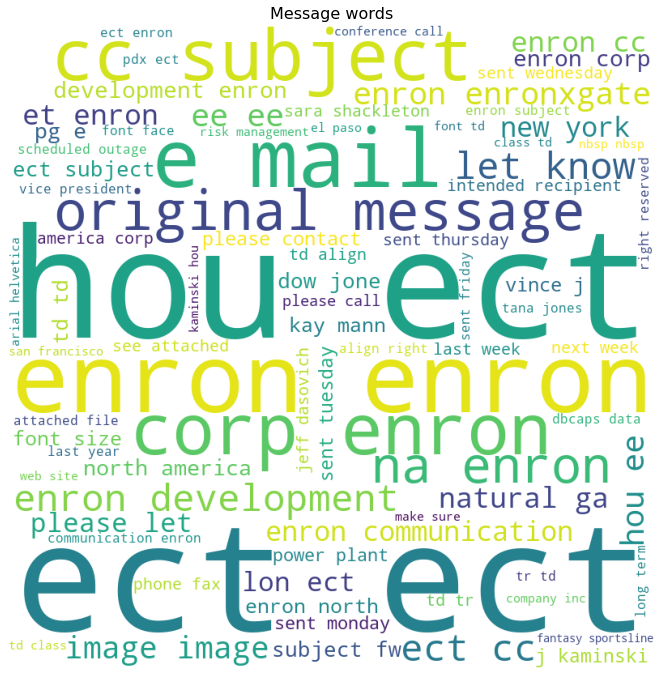

In [35]:
#Checking most popular words in text for non disaster and disaster
df_=pd.DataFrame(df['Message_clean'])
df_all= ' '.join(df_['Message_clean'])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(df_all)
 
# plot the WordCloud image                       
_=plt.figure(figsize = (9, 9), facecolor = None)
_=plt.imshow(wordcloud)
_=plt.axis("off")
_=plt.tight_layout(pad = 0)
_=plt.title('Message words',size=16)

plt.show()

In [39]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=10,
                            max_features=2000, #only keep 2000 most frequent words
                            ngram_range=[1,3]) 

dtm = vectorizer.fit_transform(df['Message_clean'])

In [40]:
#chose 10 for n_components
lda_model = LatentDirichletAllocation(n_components=7,
                                      doc_topic_prior=None,
                                      topic_word_prior=None,
                                      max_iter=200, 
                                      learning_method='batch', 
                                      random_state=42,
                                      n_jobs=2,
                                      verbose=0)
lda_output = lda_model.fit(dtm)

# Log Likelyhood: Higher the better
ll = lda_model.score(dtm)

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
perp = lda_model.perplexity(dtm)

In [41]:
#top words per topic

for i,topic in enumerate(lda_model.components_):
    print("\n")
    print(f"The top 10 words for topic # {i}\n")
    for index in topic.argsort()[-10:]:
        print(vectorizer.get_feature_names()[index])



The top 10 words for topic # 0

price
let know
request
know
kate
report
gas
please
thanks
deal


The top 10 words for topic # 1

time
meeting
gas
business
company
energy
would
power
market
enron


The top 10 words for topic # 2

shackleton
master
eb
fax
doc
enron
sara
please
agreement
attached


The top 10 words for topic # 3

ect ect cc
ect cc
cc
enron enron
hou ect ect
enron
ect ect
hou ect
hou
ect


The top 10 words for topic # 4

mail
kay
enron com
subject
sent
original
original message
message
enron
com


The top 10 words for topic # 5

mail
please
email
click
image
enron
http www
www
http
com


The top 10 words for topic # 6

time
like
would
good
let
thanks
going
get
know
schedule
